In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal
from numpy import pi

from IPython.display import Image  

from scipy.fftpack import fft, fftfreq
from time import time

%matplotlib inline
params = {'legend.fontsize': 16,
          'figure.figsize': (10, 8),
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params) 


## Serie de Fourier


Si $f(t)$  es una función de variable real $t$, que es integrable en el intervalo $[t_0-T/2,t_0+T/2]\,$  entonces se puede obtener el desarrollo en serie de Fourier de $f(t)\,$ en ese intervalo. 
Fuera del intervalo la serie es periódica, con período $T\,$. 

Si $f(t)$ es periódica en toda la recta real, la aproximación por series de Fourier también será válida en todos los valores de $t\,$. 

### Serie de Fourier trigonometrica

Luego la serie de Fourier asociada a $f(t)\,$ es:

$$f(t) \sim \frac{a_0}{2} + \sum_{n=1}^\infty\left[a_n\cos \left( \frac{2n\pi}{T}t \right) + b_n\sin \left( \frac{2n\pi}{T}t \right) \right]$$

Donde $a_0$, $a_n$ y $b_n$ son los coeficientes de la serie de Fourier que toman los valores:

$$ a_0 = \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}}  f(t) dt $$

$$ a_n = \frac{2}{T} \int_{-T/2}^{T/2}  f(t) \cos \left( \frac{2n \pi}{T} t \right) dt$$

$$ b_n = \frac{2}{T} \int_{-T/2}^{T/2}  f(t) \sin \left(\frac{2n\pi}{T}t\right) dt$$


### Serie de Fourier exponencial
Por la identidad de Euler, las fórmulas de arriba pueden expresarse también en su forma compleja:

$$ f(t) \sim \sum_{n=-\infty}^{\infty} c_{n}\,e^{2\pi i\frac{n}{T}t}.$$

Los coeficientes ahora serían:

$$c_n=\frac{1}{T}\int_{-T/2}^{T/2} f(t)\,e^{-2\pi i\frac {n}{T}t}\,dt.$$

Otra forma de definir la serie de Fourier es:

$$f(t) = \frac{a_0}{2} + \sum_{n=1}^\infty\left(a_n\cos{{\omega_n}{t}} + b_n\sin{{\omega_n}{t}}\right)$$

donde
$\omega_n=n\omega$
y
$\omega=2{\pi}f=\frac{2{\pi}}{T}$

siendo:

$$ a_0 = \frac{2}{T} \int_{t_0}^{t_0+T}  f(t) dt$$

$$ a_n = \frac{2}{T} \int_{t_0}^{t_0+T}  f(t) \cos{{\omega_n}{t}} dt$$ 

$$ b_n=\frac{2}{T} \int_{t_0}^{t_0+T} f(t) \sin{{\omega_n}{t}} dt$$



### Euler's formula:
$$ e^{ i \theta} = cos(\theta) + i \cdot sin(\theta)$$




### Serie de Fourier exponencial discreta

Sea x(n) una señal aperiódica discreta en el tiempo, la transformada discreta de Fourier (DFT) de esta señal se define como:

$$X[k]= \sum_{n=0}^{N-1} x[n]\,e^{-j 2\pi n \frac{k}{N}}$$

en la cual X(k) es un conjunto de números complejos. 

La evaluación directa de esa fórmula requiere $N^{2}$ operaciones aritméticas, pero con un algoritmo FFT se puede obtener el mismo resultado con sólo $N log N$ operaciones.


$$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]\cdot e^{i 2 \pi k \frac{n}{N}}$$

In [2]:
# Estas funciones calculas las componentes de la serie de Fourier para una senal dada
# A cada función se pasa como argumento la señal x y el numero de armonico a calcular.
# El muestreo se define por la cantidad de muestras dentro del periodo de la señal x.


# Transformada Discreta de Fourier     
def DFT(x):
    N = len(x)
    print(N)
    X = list()
    for k in range(N):
        X.append( sum([s*np.exp(-2j*np.pi*n*k/N) for n,s in enumerate(x)]))
    return np.array(X)  
    


# Transformada Inversa Discreta de Fourier       
def IDFT(X):
    N = len(X)
    x = list()
    for n in range(N):
        x.append( sum([S*np.exp(2j*np.pi*k*n/N) for k,S in enumerate(X)]))
    return np.array(x)/N  



    
def freq(X, fs):
    N =  len(X)
    fo = np.arange(0,N/2,1) *fs/ N
    fo = np.append(fo,np.arange(-N/2,0,1) *fs/N )
    return fo

def tim(x, fs):
    return np.arange(0,len(x),1) /fs
    

### A continuación se define la función de la señal en función del tiempo. 

In [3]:
# Parametros de la señal
N  = 64        # Número de bines por traza
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)


# Vector tiempo
# np.linspace( inicio, fin, paso)
t  = np.linspace(0, (N - 1) * dt, N)  # Intervalo de tiempo en segundos 


# Señal
y = np.sin(2 * pi * f * t) - 0.5 * np.sin(2 * pi * 2 * f * t)  # Señal




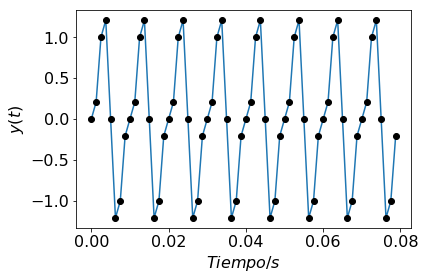

In [4]:
## PLOT 
plt.plot(t, y)
plt.plot(t, y, 'ko')
plt.xlabel('$Tiempo/s$')
plt.ylabel('$y(t)$')
plt.show()

## Cálculo del espectro empleando la funciones propias.

Se mide el tiempo de computo de la función con fines de comparación. 

64
Elapsed time: 0.0153133869 seconds.


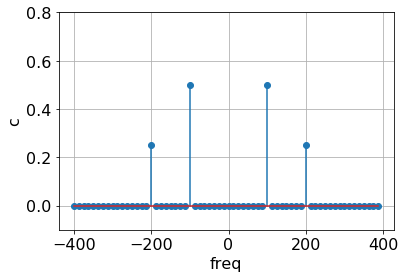

In [5]:
# Serie de Fourier Exponencial
# la separacion de las deltas = 1/T 

start_time = time()

Y    = DFT(y) / len(y)

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)



plt.stem( freq(y,fs) , np.abs(Y))

plt.ylabel('c')
plt.xlabel('freq')
plt.ylim(-0.1, 0.8)
plt.grid()
plt.show()


/home/aalmela/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


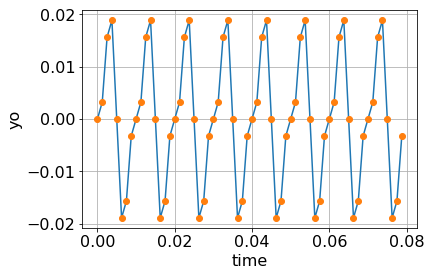

In [6]:
yo    = IDFT(Y)


plt.plot(tim(yo,fs), yo)
plt.plot(tim(yo,fs), yo,'o')

plt.ylabel('yo')
plt.xlabel('time')

plt.grid()
plt.show()


## Calculo del espectro empleando la funciones de scipy.fftpack  (fft, fftfreq)

Se emplea mide el tiempo de computo de la función con fines de comparación. 

Elapsed time: 0.0001993179 seconds.


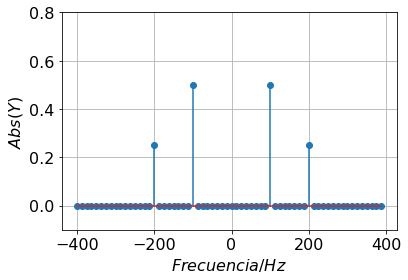

In [7]:
# se guarda el tiempo de inicio 
start_time = time()
 
Y = fft(y) / len(y)  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq = fftfreq(len(y), dt)  # Recuperamos las frecuencias

plt.stem(frq, np.abs(Y) )  # Representamos la parte imaginaria
plt.ylim(-0.1, 0.8)
plt.xlabel('$Frecuencia/Hz$')
plt.ylabel('$Abs(Y)$')
plt.grid()
plt.show()

## Spectral leakage

Cuando se calcula la transformada discreta de Fourier (DFT) de una señal (por ejemplo, para obtener la densidad espectral de potencia), el manchado espectral o leakage ocurrirá si alguna de las componentes frecuenciales cae entre frecuencias de referencia.

El leakage también tiene lugar cuando se calcula la DFT de una señal que contiene el resto de un ciclo. Por ejemplo, si una onda senoidal de 3 Hz se muestrea durante 0.9 segundos, se produce una discontinuidad, la cual causa un manchado espectral. 


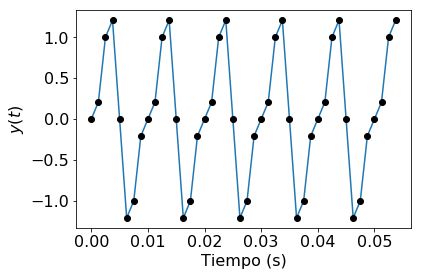

Elapsed time: 0.0001749992 seconds.


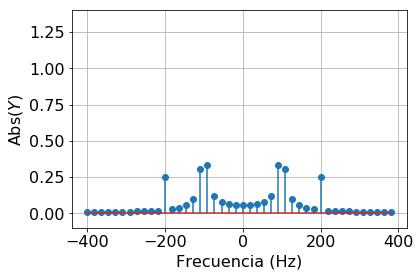

In [8]:
N2  = 44        # Número de bines
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t2  = np.linspace(0, (N2 - 1) * dt, N2)  # Intervalo de tiempo en segundos 

y2 = np.sin(2 * pi * f * t2) - 0.5 * np.sin(2 * pi * 2 * f * t2)  # Señal

plt.plot(t2, y2)
plt.plot(t2, y2, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y2 = fft(y2) / N2  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq2 = fftfreq(N2, dt)  # Recuperamos las frecuencias

plt.stem(frq2, np.abs(Y2) )  # Representamos la parte imaginaria
plt.ylim(-0.1, 1.4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Zero Padding


Zero padding es una tecnica empleada con el objetivo de tener ventanas con numeros de bines multiplos de 2. Para ello se agregan ceros al final de la muestra.

48


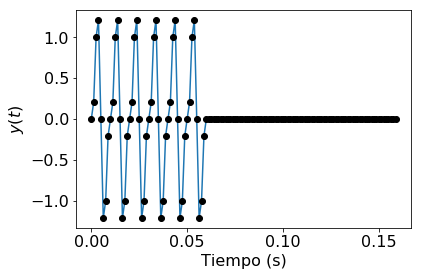

Elapsed time: 0.0001704693 seconds.


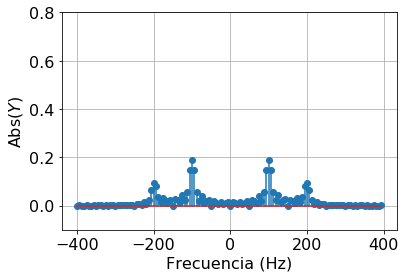

In [9]:
N3 = 128         # Número de bines
Nz = 80
f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t3  = np.linspace(0, (N3 - 1) * dt, N3)  # Intervalo de tiempo en segundos 

y3 = np.sin(2 * pi * f * t3[:-Nz]) - 0.5 * np.sin(2 * pi * 2 * f * t3[:-Nz])  # Señal
print(len(y3))
y3 =  np.append(y3,np.zeros(Nz) )


plt.plot(t3, y3)
plt.plot(t3, y3, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y3 = fft(y3) / N3  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq3 = fftfreq(N3, dt)  # Recuperamos las frecuencias

plt.stem(frq3, np.abs(Y3) )  # Representamos la parte imaginaria
plt.ylim(-0.1, 0.8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

## Ventanas 

Existe una manera de reducir la fuga y es mediante el uso de funciones ventana. Las funciones ventana no son más que funciones que valen cero fuera de un cierto intervalo, y que en procesamiento de señales digitales se utilizan para «suavizar» o filtrar una determinada señal. NumPy trae unas cuantas funciones ventana por defecto; por ejemplo, la ventana de Blackman tiene este aspecto


Como se puede ver, en los extremos del intervalo es nula. Las funciones ventana reciben un único argumento que es el número de puntos. Si multiplicamos la ventana por la señal, obtenemos una nueva señal que vale cero en los extremos. Comprobemos el resultado, representando ahora el espectro de amplitud y comparando cómo es el resultado si aplicamos o no la ventana de Blackman.

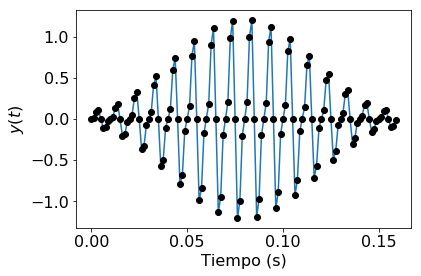

Elapsed time: 0.0001339912 seconds.


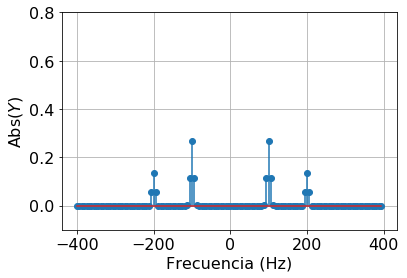

In [10]:
M = 128         # Número de bines

f  = 100.0     # Hz
fs = f * 8     # muestreo
dt = 1 / (fs)  # Espaciado (puntos por período)

# np.linspace( inicio, fin, paso)
t4  = np.linspace(0, (M - 1) * dt, M)  # Intervalo de tiempo en segundos 

y4 = np.sin(2 * pi * f * t4) - 0.5 * np.sin(2 * pi * 2 * f * t4)  # Señal


#y4 = y4 * np.bartlett(M)
#y4 = y4 * np.blackman(M) 
y4 = y4 * np.hamming(M) 
#y4 = y4 * np.hanning(M) 
#y4 = y4 * np.kaiser(M, 10) 



plt.plot(t4, y4)
plt.plot(t4, y4, 'ko')
plt.xlabel('Tiempo (s)')
plt.ylabel('$y(t)$')
plt.show()

start_time = time()
Y4 = fft(y4) / M  # Normalizada

elapsed_time = time() - start_time
print("Elapsed time: %.10f seconds." % elapsed_time)

frq4 = fftfreq(M, dt)  # Recuperamos las frecuencias

plt.stem(frq4, np.abs(Y4) )  # Representamos la parte imaginaria
plt.ylim(-0.1, .8)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Abs($Y$)')
plt.grid()
plt.show()

1250


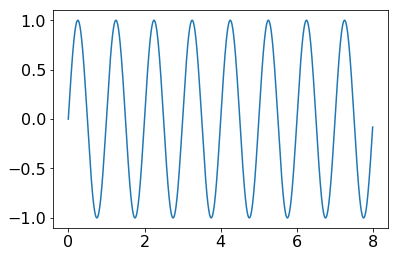

In [11]:
# Parametros de la señal
fs  = 2e6/100/128     # muestreo
fm  = 1.0             # Hz
Np  = 8              # numero de periodos
N   = int((Np*fm)*fs)
print(N)
dt  = 1 / (fs)  # Espaciado (puntos por período)
Tf  = (N - 1) * dt

# Vector tiempo
# np.linspace( inicio, fin, paso)
t  = np.linspace(0,Tf, N, endpoint=False)  # Intervalo de tiempo en segundos 


# Señal
y = np.sin(2 * pi * fm * t)   # Señal

plt.plot(t,y)

In [12]:
def eVect(N,h):
    return [np.exp(-2j*np.pi*n*h/N) for n in range(N)]

# Demodulation
def DFT(x, h): # h : harmonic
    N = len(x)
    X = ( sum([s*np.exp(-2j*np.pi*n*h/N) for n,s in enumerate(x)])) 
    return X 

468
0.546141058311
42.7037841986


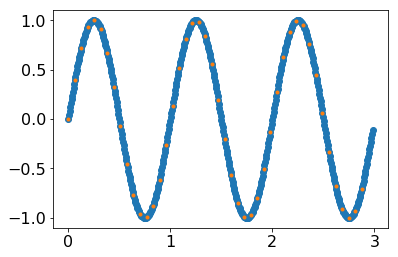

In [13]:
# Parametros de la señal
fs  = 2e6/100/128     # muestreo
fm  = 1.0             # Hz
Np  = 3              # numero de periodos
N   = int((Np*fm)*fs)
print(N)
dt  = 1 / (fs)  # Espaciado (puntos por período)
Tf  = (N - 1) * dt

# Vector tiempo
# np.linspace( inicio, fin, paso)
t  = np.linspace(0,Tf, N, endpoint=False)  # Intervalo de tiempo en segundos 


# Señal
y = np.sin(2 * pi * fm * t)   # Señal


## 
div = 10

fs  = fs/div
Npp = int(fs//fm)

Nt  = np.arange(0,N, 1) 
Na  = np.arange(0,(N//div)*div, div)  # Intervalo de tiempo en segundos 
ya = y[Na]


plt.plot(t[Nt] ,y[Nt], 'o')
plt.plot(t[Na], y[Na],'.')
print(np.abs(DFT(ya,1) ))
print(np.angle(DFT(ya,1) )/np.pi*180)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450]
15
Elapsed time: 0.9869978428 seconds.


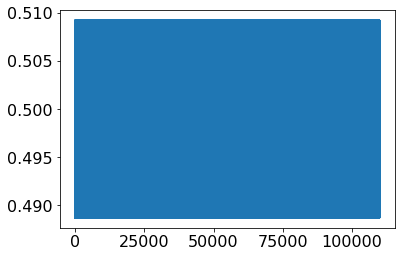

In [14]:

start_time = time()
a = list()
print((Na))
print(Npp)

for ii in range(10000): 
    for i in range(0,len(Na)-Npp,Npp//4):
        #plt.plot(ya[i:i+ Npp],'o')
        a.append(np.abs(fft(ya[i:i+ Npp])[1]/Npp))
        #plt.show()

elapsed_time = time() - start_time
plt.plot(a)
print("Elapsed time: %.10f seconds." % elapsed_time)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450]
15
Elapsed time: 6.7098062038 seconds.


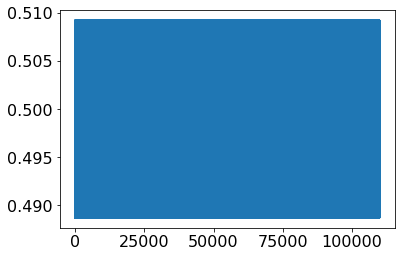

In [15]:
start_time = time()
b = list()
print((Na))
print(Npp)

for ii in range(10000):
    for i in range(0,len(Na)-Npp,Npp//4):
        #plt.plot(ya[i:i+ Npp],'o')
        b.append(np.abs(DFT(ya[i:i+ Npp],1)/Npp) )
        #plt.show()

elapsed_time = time() - start_time

plt.plot(b)
print("Elapsed time: %.10f seconds." % elapsed_time)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440 450]
15
Elapsed time: 1.6238970757 seconds.


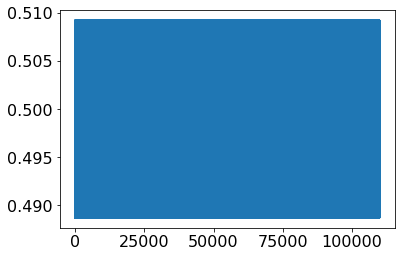

In [16]:
start_time = time()
c = list()
print((Na))
print(Npp)
A = eVect(Npp,1)

for ii in range(10000):
    for i in range(0,len(Na)-Npp,Npp//4):
        #plt.plot(ya[i:i+ Npp],'o')
        
        
        c.append(np.abs( sum((ya[i:i+ Npp]*A))/Npp)) 
        #plt.show()

elapsed_time = time() - start_time

plt.plot(c)
print("Elapsed time: %.10f seconds." % elapsed_time)

In [17]:

ok = (a == a[1])
print(ok)

[False  True False ..., False False False]


In [18]:
a = np.array([0,10,10,10,20,30,10000])
dd, mini, maxi = scipy.stats.sigmaclip(a, low=3, high=3)
print(dd)
print(np.sqrt(np.mean(np.square(dd))))

[    0    10    10    10    20    30 10000]
3779.67496713


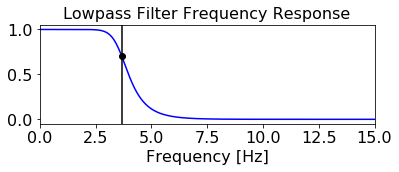

In [19]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
